In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Exploratory Data Analysis
path = 'D:\\Sandbox\\Github\\DATA\\kc_house_data.csv'
df = pd.read_csv(path) 
df.sort_values('price',ascending=False).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
df = df.drop('id',axis=1)
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)
df = df.drop('date',axis=1)
df = df.drop('zipcode',axis=1)

In [5]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [6]:
X = df.drop('price',axis=1)
y = df['price']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape
X_test.shape

(6480, 19)

In [10]:
# Creating a Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [11]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')


In [12]:
history = model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 0s 3ms/step - loss: 430240727040.0000 - val_loss: 418931343360.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 429593198592.0000 - val_loss: 416748732416.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 421003689984.0000 - val_loss: 397145604096.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 377559646208.0000 - val_loss: 323132882944.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 267615158272.0000 - val_loss: 187798208512.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 142987313152.0000 - val_loss: 104002822144.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 101446664192.0000 - val_loss: 95413600256.0000
Epoch 8/400
119/119 [==============================] - 0s 3ms/step - loss: 98036842496.0000 - val_loss: 94137737216.0000
Epoch 9/400
119/119

In [13]:
losses = pd.DataFrame(history.history)

<AxesSubplot:>

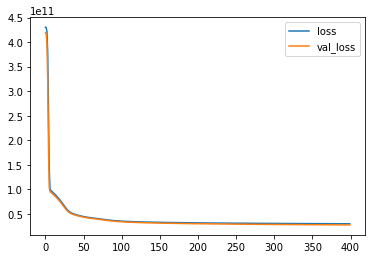

In [14]:
losses.plot()

In [15]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [16]:
# Predicting on Brand New Data
X_test

array([[0.1       , 0.08      , 0.04239917, ..., 0.00887725, 0.63636364,
        0.        ],
       [0.3       , 0.36      , 0.17269907, ..., 0.00993734, 0.81818182,
        0.        ],
       [0.2       , 0.24      , 0.12512927, ..., 0.00547073, 0.90909091,
        0.        ],
       ...,
       [0.1       , 0.08      , 0.05584281, ..., 0.00506255, 1.        ,
        0.        ],
       [0.3       , 0.2       , 0.22233713, ..., 0.00774485, 0.09090909,
        1.        ],
       [0.3       , 0.32      , 0.27611169, ..., 0.0196531 , 0.45454545,
        0.        ]])

In [43]:
predictions = model.predict(X_test)

### Evaluation Methods for Linear Regression problems

#### MAE, MSE, RMSE

In [44]:
mae = mean_absolute_error(y_test,predictions)
mse = np.sqrt(mean_squared_error(y_test,predictions))
rmse = np.sqrt(mse)
evs = explained_variance_score(y_test,predictions)

In [46]:
print (mae)
print (mse)
print (rmse)
print (evs)

102707.6032503858
166117.768552764
407.5754758971202
0.7919977045575343


In [19]:
df['price'].mean()

540296.5735055795

In [20]:
df['price'].median()

450000.0

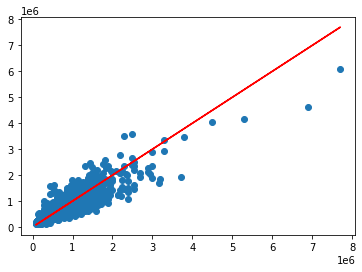

In [21]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [23]:
errors = y_test.values.reshape(6480, 1) - predictions
errors.mean()

-3254.9206621334874

In [25]:
### Predicting on a brand new house
single_house = df.drop('price',axis=1).iloc[0]
single_house = scaler.transform(single_house.values.reshape(-1, 19))
single_house

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.81818182, 0.        ]])

In [26]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64

In [29]:
predicted_price = model.predict(single_house)

In [30]:
predicted_price

array([[275013.88]], dtype=float32)

In [39]:
price_diff = predicted_price - df.iloc[0]['price']

In [40]:
price_diff

array([[53113.875]], dtype=float32)